In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf

print(tf.__version__)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2.6.4
/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [3]:
train_data = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test_data = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
# print(train_data)
# print(test_data)
train_labels = train_data.pop('label')
test_labels = train_labels.copy()
# test_labels = test_data.pop('label')

In [4]:
print(train_labels)
print(test_labels)
train_data

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64
0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


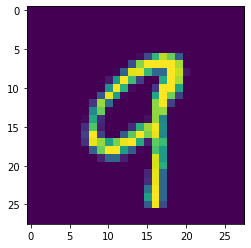

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# print(train_data)
# train_data.head()

# # You can put between 0 to 41999 here
index = 41999

sample_data = train_data.copy()
sample_data = np.array(sample_data) / 255
sample_data = np.reshape(sample_data, (sample_data.shape[0], 28, 28))

X = sample_data.copy()

mean_px = X.mean().astype(np.float32)
std_px = X.std().astype(np.float32)
X = (X - mean_px)/(std_px)

# Print the label and image
# print(f'LABEL: {train_labels[index]}')
# print(f'\nIMAGE PIXEL ARRAY:\n {sample_data[index]}')

# Visualize the image
plt.imshow(sample_data[index])

# # Set number of characters per row when printing
# np.set_printoptions(linewidth=320)

# # Print the label and image
# print(f'LABEL: {train_labels[index]}')
# print(f'\nIMAGE PIXEL ARRAY:\n {train_data[index]}')

# # Visualize the image
# plt.imshow(train_data[index])

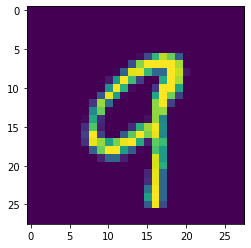

In [6]:
plt.imshow(X[index])

In [162]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.08, random_state=42)
y_train  = y_train.astype(int)
y_test  = y_test.astype(int)
batch_size =len(X_train)

print(X_train.shape, y_train.shape,y_test.shape )

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Train
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
# test
X_test_scaled = scaler.fit_transform(X_test.astype(np.float64))
feature_columns = [tf.feature_column.numeric_column('x', shape=X_train_scaled.shape[1:])]
X_train_scaled.shape[1:]

train_images = np.asarray(X_train.copy()) / 255.0
dev_images = np.asarray(X_test.copy()) / 255.0
test_images = np.asarray(test_data.copy()) / 255.0

# print(train_data.shape)

train_images = np.reshape(train_images, (train_images.shape[0], 28, 28))
dev_images = np.reshape(dev_images, (dev_images.shape[0], 28, 28))
test_images = np.reshape(test_images, (test_images.shape[0], 28, 28))

(38640, 784) (38640,) (3360,)


In [152]:
# detect and init the TPU
# tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()

# # instantiate a distribution strategy
# tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

# with tpu_strategy.scope():
#     model = tf.keras.models.Sequential([
#         tf.keras.layers.Reshape((-1, 28, 28, 1)),
#         tf.keras.layers.Conv2D(18, (5, 5), padding="same", activation=tf.nn.selu),
#         tf.keras.layers.Reshape((28, 28, 18)),
#         tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
#         tf.keras.layers.Conv2D(36, (5, 5), padding="same", activation=tf.nn.selu),
#         tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
#         tf.keras.layers.Reshape((-1, 7 * 7 * 36)),
#         tf.keras.layers.Dense(units=7*7*36, activation=tf.nn.selu),
#         tf.keras.layers.Dropout(.25),
#         tf.keras.layers.Dense(10, activation=tf.nn.softmax)
#     ])
    
#     model.compile(optimizer = tf.optimizers.Adam(learning_rate=0.0026),
#               loss = 'sparse_categorical_crossentropy',
#               metrics=['accuracy'])

In [179]:
# model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
#                                     tf.keras.layers.Dense(128, activation=tf.nn.relu), 
#                                     tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model = tf.keras.models.Sequential([
    tf.keras.layers.Reshape((-1, 28, 28, 1)),
    tf.keras.layers.Conv2D(14, (5, 5), padding="same", activation=tf.nn.selu),
    tf.keras.layers.Reshape((28, 28, 14)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(24, (5, 5), padding="same", activation=tf.nn.selu),
#     tf.keras.layers.Reshape((14, 14, 24)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(36, (5, 5), padding="same", activation=tf.nn.selu),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Reshape((-1, 3 * 3 * 36)),
    tf.keras.layers.Dense(units=3*3*36, activation=tf.nn.selu),
    tf.keras.layers.Dropout(.12),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [180]:
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 0.9999999999999999
class with highest probability: 2


In [181]:
model.compile(optimizer = tf.optimizers.Adam(learning_rate=0.001),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, y_train, epochs=10)

Epoch 1/10
1208/1208 [==============================] - 5s 4ms/step - loss: 0.1729 - accuracy: 0.9478
Epoch 2/10
1208/1208 [==============================] - 5s 4ms/step - loss: 0.0800 - accuracy: 0.9766
Epoch 3/10
1208/1208 [==============================] - 5s 4ms/step - loss: 0.0569 - accuracy: 0.9826
Epoch 4/10
1208/1208 [==============================] - 5s 4ms/step - loss: 0.0498 - accuracy: 0.9854
Epoch 5/10
1208/1208 [==============================] - 5s 4ms/step - loss: 0.0420 - accuracy: 0.9879
Epoch 6/10
1208/1208 [==============================] - 5s 4ms/step - loss: 0.0370 - accuracy: 0.9890
Epoch 7/10
1208/1208 [==============================] - 5s 4ms/step - loss: 0.0350 - accuracy: 0.9898
Epoch 8/10
1208/1208 [==============================] - 5s 4ms/step - loss: 0.0320 - accuracy: 0.9913
Epoch 9/10
1208/1208 [==============================] - 5s 4ms/step - loss: 0.0304 - accuracy: 0.9920
Epoch 10/10
1208/1208 [==============================] - 5s 4ms/step - loss: 0.031

In [178]:
model.evaluate(dev_images, y_test)

105/105 [==============================] - 0s 2ms/step - loss: 0.1594 - accuracy: 0.9848


[0.15940618515014648, 0.9848214387893677]

In [165]:
model.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_109 (Reshape)        (None, 1, 28, 28, 1)      0         
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 1, 28, 28, 14)     364       
_________________________________________________________________
reshape_110 (Reshape)        (None, 28, 28, 14)        0         
_________________________________________________________________
max_pooling2d_89 (MaxPooling (None, 14, 14, 14)        0         
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 14, 14, 24)        8424      
_________________________________________________________________
max_pooling2d_90 (MaxPooling (None, 7, 7, 24)          0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 7, 7, 36)        

In [166]:
train_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [167]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Label: 2


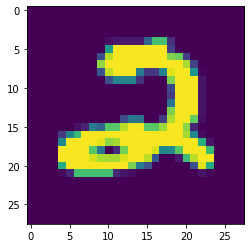

In [168]:
index = 0
predictions = model.predict(test_images)
# print(test_images.shape)
# print(predictions.shape)
# print(predictions)
predictions = [np.argmax(x) for x in predictions]
# print(predictions_c)
print(f"Label: {predictions[index]}")
plt.imshow(test_images[index])

In [169]:
output = model.predict(test_images)
i_arr = np.array([x+1 for x in range(len(output))])
output = np.array([i_arr, [np.argmax(x) for x in output]])
output

array([[    1,     2,     3, ..., 27998, 27999, 28000],
       [    2,     0,     9, ...,     3,     9,     2]])

In [170]:
df_output = pd.DataFrame(output.T, columns = ['ImageId', 'Label'])
df_output

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [173]:
df_output.to_csv('submission1.csv', index=False, header=True)

In [174]:
model.save('model.h5')